# Get cocrystalized molecules from PDB

- Extract the cocrystalized molecules from the PDB structures.
- The active site is defined by a reference PDB structure and the name of the cocrystalized molecule (3-letter identifier code).

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import itertools
from pathlib import Path
from prody import parsePDB
import sys
sys.path.insert(0, '../..')
from helper_modules.get_cocristalized_ligands \
     import get_pocket_ligand, PocketResidues

- Load the table containing the PDBs metadata.

In [2]:
prot_name  = 'fxa'

In [3]:
path_df_file = glob(f"./TABLA_MTDATA_{prot_name.upper()}_*_crys.json")[0]
df_prot      = pd.read_json(path_df_file)
df_prot.set_index('PDB_ID', inplace=True)
df_prot.tail(3)

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs
PDB_ID,,,,,,,,,,,,
5k0h,human factor xa in complex with synthetic inhi...,2016-07-06,2,A,2.20,-,47.950820,2,"[235, 21]","[[1, 235], [469, 489]]",2,"[6PK, CA]"
5voe,desgla-xas195a bound to aptamer 11f7t,2018-06-20,3,H,2.00,-,47.336066,3,"[235, 3, 22]","[[1, 235], [370, 372], [467, 488]]",5,"[CA, CFL, MG, NA, UFT]"
5vof,desgla-xas195a bound to aptamer 11f7t and riva...,2018-06-13,3,H,2.25,-,47.336066,3,"[235, 3, 22]","[[1, 235], [370, 372], [467, 488]]",6,"[CA, CFL, MG, NA, RIV, UFT]"


- How many PDB entries have a cocristalized molecule?

In [4]:
df_prot_ligs = df_prot[df_prot.NumLigs > 0]
print(F'{len(df_prot_ligs)} of {len(df_prot)} structures have at least one HETATM molecule.')

134 of 136 structures have at least one HETATM molecule.


- How many different small molecules (HETAMT) are there?

In [5]:
# How many cocrystalized molecules are there?
# A set of all HETATM molecules
lig_full_list = list( itertools.chain.from_iterable( df_prot.NameLigs ) )
print(f'There are a total of {len(lig_full_list)}', 
       'HETATM molecules (duplicates included).')

lig_all_list = list(set(lig_full_list))
print(f'There are {len(lig_all_list)} unique', 
       'HETATM molecules (without duplicates).')

There are a total of 314 HETATM molecules (duplicates included).
There are 147 unique HETATM molecules (without duplicates).


### Visualize the pocket residues

In [6]:
# Use a reference structure to visualize the pocket residues
ref_struc_id    = '1ezq'
ref_ligand_name = 'RPR'

In [7]:
pkt_info = PocketResidues(ref_struc_id, ref_ligand_name)
pocket_residues_str = pkt_info.get_pocket_residues_as_list()
print('Indices of pocket redsidues:', pocket_residues_str)

Indices of pocket redsidues: 17 57 96 97 98 99 100 143 145 147 148 149 172 174 175 180 183 189 190 191 192 193 194 195 196 213 214 215 216 217 219 220 221 222 225 226 227 228


In [8]:
view = pkt_info.visualize_pocket()
view

NGLWidget()

In [11]:
view.render_image()

Image(value=b'', width='99%')

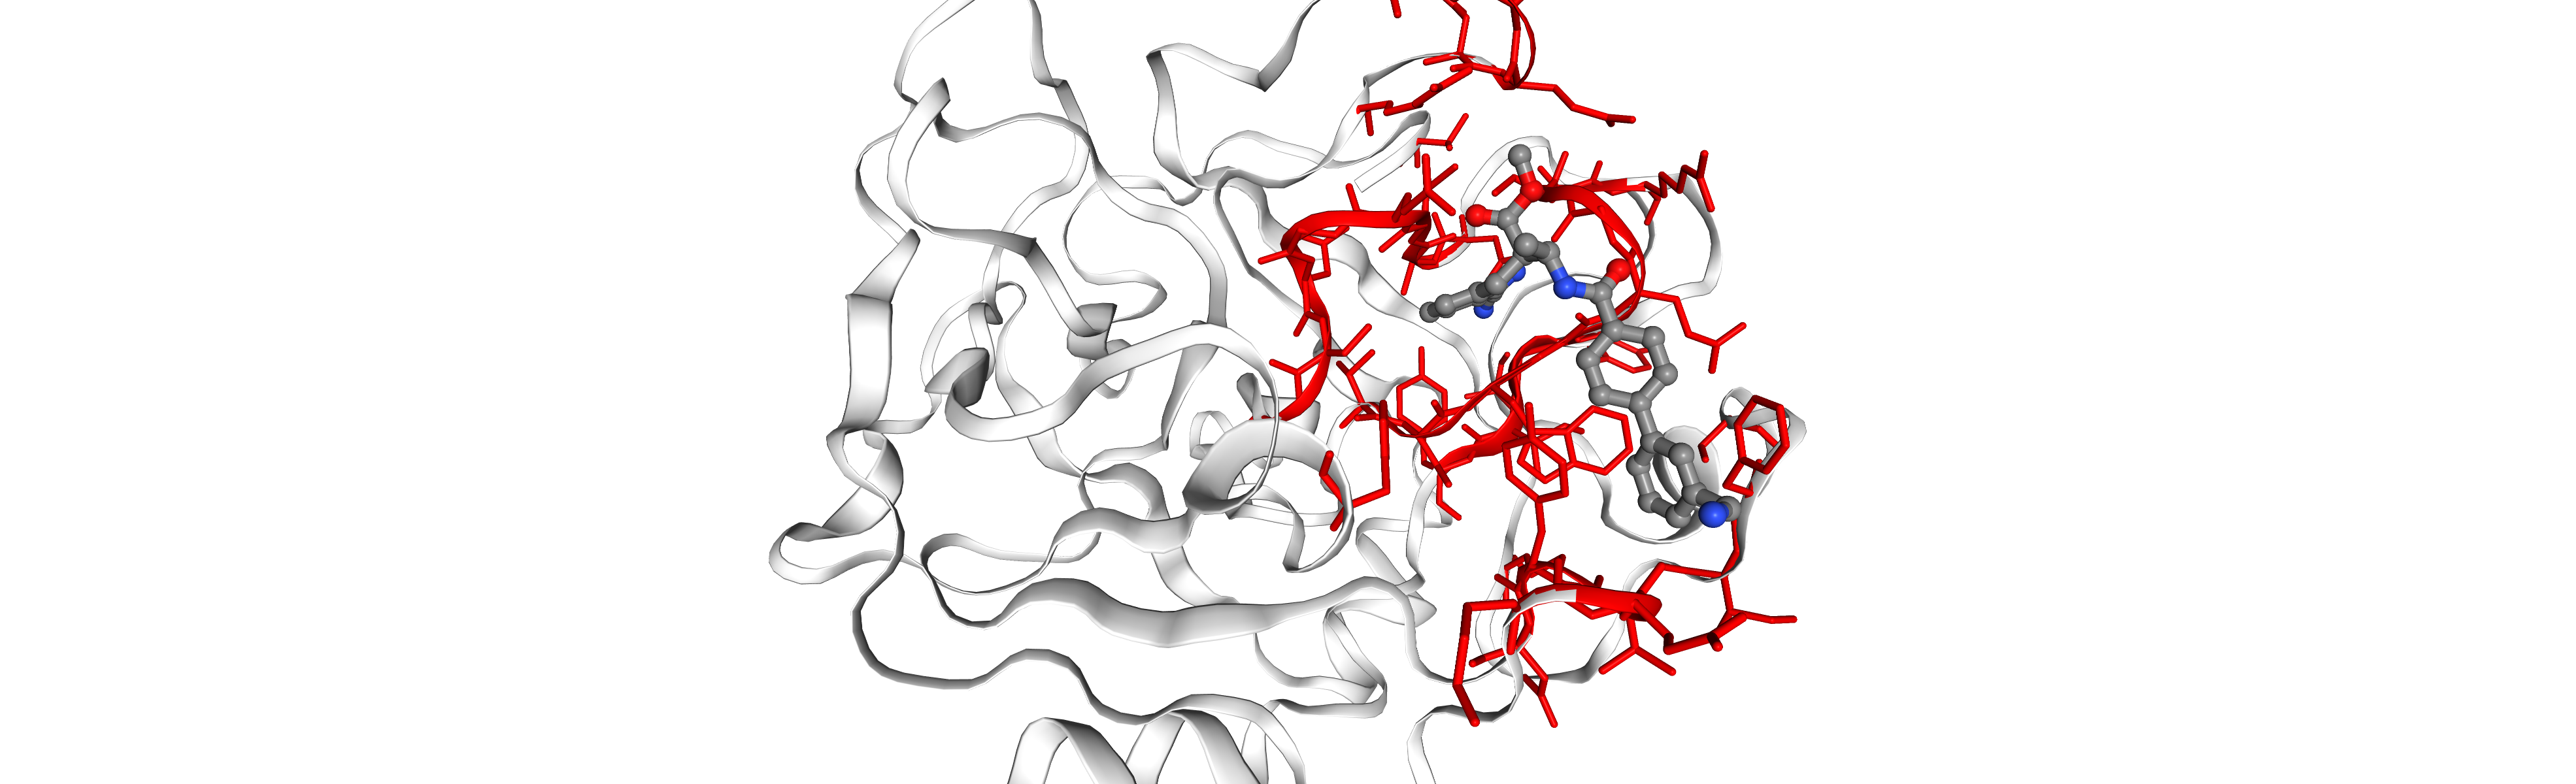

In [13]:
view._display_image()

## Carry out the Analysis
- Define the input files and the output directory.

In [11]:
# Define the output directories
OUT_MAIN          = './pdb_structures'
IN_DIR_ENSEMBLE   = f'{OUT_MAIN}/pdb_prepared'
IN_DIR_RAW_LIGS   = f'{OUT_MAIN}/raw_ligands'
OUT_DIR_PREP_LIGS = f'{OUT_MAIN}/pocket_ligands'

# Create the output directory if it doesnt exists
Path(OUT_DIR_PREP_LIGS).mkdir(parents = True, exist_ok = True)

- Update the main Dataframe with ligands information
 - Inhib: Name of the molecule found inside the pocket.
 - Inhib_mass: Molecular weight of the found molecule.
Save the updated dataframe:

In [12]:
# We will add two new columns to the dataframe
df_prot["Inhib"] = ""
df_prot["Inhib_mass"] = np.nan

# Get all pocket ligands
for pdb_id in df_prot.index:
    inhibidor = get_pocket_ligand(
                        pdb_id = pdb_id, 
                        pocket_residues = pocket_residues_str,
                        raw_lig_dir     = IN_DIR_RAW_LIGS,
                        prot_chain_dir  = IN_DIR_ENSEMBLE,
                        pk_ligs_dir = OUT_DIR_PREP_LIGS,
                        write_files = True, 
                        cutoff      = 8,
                        min_weight  = 97
                 )

    df_prot.at[str(pdb_id), 'Inhib'] = inhibidor[0]
    df_prot.at[pdb_id, 'Inhib_mass'] = inhibidor[1]
print('...')

The model 1c5m HAS NO LIGAND inside the pocket.
Protein 1ezq:
   Molecules found: ['CA' 'HOH' 'RPR'] -> ligand RPR saved.
Protein 1f0r:
   Molecules found: ['815' 'CA' 'HOH'] -> ligand 815 saved.
Protein 1f0s:
   Molecules found: ['CA' 'HOH' 'PR2'] -> ligand PR2 saved.
Protein 1fax:
   Molecules found: ['CA' 'DX9'] -> ligand DX9 saved.
Protein 1fjs:
   Molecules found: ['CA' 'CL' 'GOL' 'HOH' 'Z34'] -> ligand Z34 saved.
Protein 1g2l:
   Molecules found: ['CA' 'HOH' 'T87'] -> ligand T87 saved.
Protein 1g2m:
   Molecules found: ['CA' 'R11'] -> ligand R11 saved.
The model 1hcg HAS NO LIGAND inside the pocket.
Protein 1ioe:
   Molecules found: ['CA' 'XMA'] -> ligand XMA saved.
Protein 1iqe:
   Molecules found: ['CA' 'XMB'] -> ligand XMB saved.
Protein 1iqf:
   Molecules found: ['CA' 'XMD'] -> ligand XMD saved.
Protein 1iqg:
   Molecules found: ['CA' 'HOH' 'XME'] -> ligand XME saved.
Protein 1iqh:
   Molecules found: ['CA' 'XMF'] -> ligand XMF saved.
Protein 1iqi:
   Molecules found: ['CA' '

### Updated Dataframe

In [13]:
file = f'TABLA_MTDATA_{prot_name.upper()}_136_crys_LIGS_INFO.json'
if Path(file).exists():
    df_prot = pd.read_json(file)
else:
    df_prot.to_json(file)
df_prot.head()

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs,Inhib,Inhib_mass
1c5m,structural basis for selectivity of a small mo...,2000-12-22,2,D,1.95,-,49.385246,2,"[235, 14]","[[1, 235], [475, 488]]",0,[],None,NaN
1ezq,crystal structure of human coagulation factor ...,2000-09-20,2,A,2.20,-,47.950820,2,"[235, 21]","[[1, 235], [469, 489]]",2,"[CA, RPR]",RPR,428.0
1f0r,crystal structure of human coagulation factor ...,2000-09-20,2,A,2.10,-,47.950820,2,"[235, 21]","[[1, 235], [469, 489]]",2,"[815, CA]",815,434.0
1f0s,crystal structure of human coagulation factor ...,2000-09-20,2,A,2.10,-,47.950820,2,"[235, 21]","[[1, 235], [469, 489]]",2,"[CA, PR2]",PR2,410.0
1fax,coagulation factor xa inhibitor complex,1997-10-29,2,A,3.00,-,48.155738,2,"[235, 20]","[[1, 235], [470, 489]]",2,"[CA, DX9]",DX9,422.0


Finished!